In [6]:
from pathlib import Path
from freqtrade.configuration import Configuration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

path='F:\\Projects\\freqtrade\\'

config = Configuration.from_files([path + "config_binance_test.json"])

data_location = Path(config['user_data_dir'], 'data', 'binance')

pair = "BTC_USDT"

config["timeframe"] = '4h'

In [7]:
# Load data using values set above
from freqtrade.data.history import load_pair_history

dataframe = load_pair_history(datadir=data_location,
                            timeframe=config["timeframe"],
                            pair=pair)

# Confirm success
print("Loaded " + str(len(candles)) + f" rows of data for {pair} from {data_location}")
candles.head()

Loaded 7356 rows of data for BTC_USDT from F:\Projects\freqtrade\user_data\data\binance


,date,open,high,low,close,volume
0,2017-12-01 00:00:00+00:00,9837.00,9900.03,9510.00,9698.23,967.919509
1,2017-12-01 04:00:00+00:00,9666.28,9924.99,9380.00,9540.00,852.486397
2,2017-12-01 08:00:00+00:00,9540.00,10000.00,9540.00,9956.24,974.139789
3,2017-12-01 12:00:00+00:00,9960.01,10740.00,9960.01,10460.00,1674.090864
4,2017-12-01 16:00:00+00:00,10460.00,10607.40,10354.01,10529.10,808.310335


In [8]:
dataframe.sort_values(by='date',ascending = False)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7356 entries, 0 to 7355
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   date    7356 non-null   datetime64[ns, UTC]
 1   open    7356 non-null   float64            
 2   high    7356 non-null   float64            
 3   low     7356 non-null   float64            
 4   close   7356 non-null   float64            
 5   volume  7356 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(5)
memory usage: 344.9 KB


<AxesSubplot:xlabel='date'>

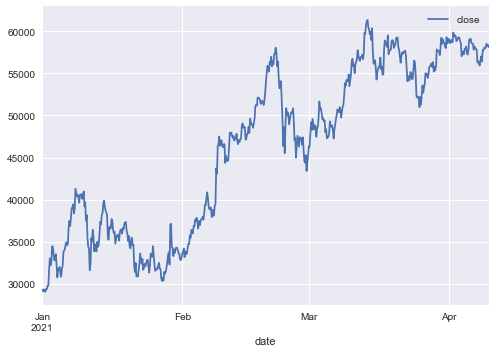

In [10]:
data = dataframe.set_index('date', drop=False)
data_red = data['2021-01-01':'2021-06-10']
data_red.plot('date',['close'])

In [14]:
# Add your lib to import here
import talib.abstract as ta
import freqtrade.vendor.qtpylib.indicators as qtpylib
import math

# Momentum Indicator
# ------------------------------------
# RSI
dataframe['rsi'] = ta.RSI(dataframe)

# Overlap Studies
# ------------------------------------

# Bollinger bands
bollinger = qtpylib.bollinger_bands(qtpylib.typical_price(dataframe), window=20, stds=4)
dataframe['bb_lowerband'] = bollinger['lower']
dataframe['bb_middleband'] = bollinger['mid']
dataframe['bb_upperband'] = bollinger['upper']

bollinger3 = qtpylib.bollinger_bands(qtpylib.typical_price(dataframe), window=20, stds=3)
dataframe['bb_lowerband3'] = bollinger3['lower']
dataframe['bb_middleband3'] = bollinger3['mid']
dataframe['bb_upperband3'] = bollinger3['upper']


In [16]:
dataframe.loc[
            (
             # (dataframe['rsi'] > 12) &
             (dataframe["close"] < dataframe['bb_lowerband3'] )
            ),
            'buy'] = 1

dataframe.loc[
            (
             (dataframe['rsi'] > 75) &
             (dataframe["close"] > dataframe['bb_middleband'] )
            ),
            'sell'] = 1

dataframe = dataframe.set_index('date', drop=False)

In [17]:
dataframe_between = dataframe['2019-05-17':'2019-07-24']
from freqtrade.plot.plotting import  generate_candlestick_graph

graph = generate_candlestick_graph(pair=pair,
                                   data=dataframe_between,
                                   #trades=candles,
                                   indicators1=['bb_lowerband', 'bb_middleband', 'bb_upperband', 'bb_lowerband3', 'bb_middleband3', 'bb_upperband3', 'lower', 'mid', 'upper', 'buy', 'sell'],
                                   indicators2=['rsi']
                                  )
graph.show()